In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# !pip install xlrd # runs cmd on system

In [2]:
# read all datasets 
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')
maternity_leave = pd.read_excel('../data/Maternity leave benefits.xls', skiprows= 2)
country_id = pd.read_csv('../data/UNSD — Methodology.csv', delimiter = ';', skiprows=[66, 125, 126]) # errors in line 67, 125, 127
employed = pd.read_csv('../data/UNdata_Export_Employed.csv')
unemployed = pd.read_csv('../data/UNdata_Export_Unemployed.csv')

C:\Users\MJ\AppData\Local\Temp\ipykernel_23068\1697627511.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  employed = pd.read_csv('../data/UNdata_Export_Employed.csv')


- Source for Maternity Leave Dataset: https://data.un.org/DocumentData.aspx?id=344
- Source for Country ID Dataset: https://unstats.un.org/unsd/methodology/m49/overview/
- Source for Employed Dataset: https://data.un.org/Data.aspx?d=LABORSTA&f=tableCode%3a2B
- Source for Unemployed Dataset: https://data.un.org/Data.aspx?d=LABORSTA&f=tableCode%3a3A

In [3]:
# inspect each dataset - Maternity Leave Dataset
print('Maternity Leave Dataset:')
display(maternity_leave.head(10))
display(maternity_leave.tail(10))

# inspect each dataset - Country ID Dataset
print('\nStandard country or area codes (M49) for country specification:')
display(country_id.head(10))
display(country_id.tail(10))

Maternity Leave Dataset:


,Country or area,Length of maternity \nleave,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Percentage of wages paid in covered period (%),Unnamed: 7,Unnamed: 8,Provider of benefit
0,Afghanistan,NaN,90,days,NaN,NaN,100,NaN,NaN,Employer
1,Albania,NaN,365,calendar days,NaN,NaN,"80, 50",a,NaN,Social insurance system
2,Algeria,NaN,14,weeks,NaN,NaN,100,NaN,NaN,Social security
3,Andora,NaN,16,weeks,NaN,NaN,100,NaN,NaN,Social insurance system
4,Angola,NaN,12,weeks,NaN,NaN,100,NaN,NaN,Social security and Employer
5,Antigua and Barbuda,NaN,13,weeks,NaN,NaN,"100, 60",b,NaN,Social insurance and Employer
6,Argentina,NaN,90,days,NaN,NaN,100,c,NaN,Family allowance funds (financed through state...
7,Armenia,NaN,140,days,NaN,NaN,100,NaN,NaN,Social insurance
8,Australia,NaN,18,weeks,NaN,NaN,…,d,NaN,Social assistance system financed by the State
9,Austria,NaN,16,weeks,NaN,NaN,100,NaN,NaN,"Statutory health insurance, family burden equa..."


,Country or area,Length of maternity \nleave,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Percentage of wages paid in covered period (%),Unnamed: 7,Unnamed: 8,Provider of benefit
171,United Republic of Tanzania,NaN,12,weeks,NaN,NaN,100,NaN,NaN,Employer
172,United States of America,NaN,12,weeks,NaN,NaN,…,q2,NaN,…
173,Uruguay,NaN,12,weeks,NaN,NaN,100,r2,NaN,Social security system
174,Uzbekistan,NaN,126,calendar days,NaN,NaN,100,d,NaN,State social insurance scheme
175,Vanuatu,NaN,12,weeks,NaN,NaN,66,NaN,NaN,Employer
176,Venezuela,NaN,18,weeks,NaN,NaN,100,NaN,NaN,Social security
177,Viet Nam,NaN,4-6,months,s2,NaN,100,NaN,NaN,Social insurance fund
178,Yemen,NaN,60,days,NaN,NaN,100,NaN,NaN,Employer
179,Zambia,NaN,12,weeks,NaN,NaN,100,NaN,NaN,Employer
180,Zimbabwe,NaN,98,days,NaN,NaN,100,NaN,NaN,Employer



Standard country or area codes (M49) for country specification:


,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN
5,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Tunisia,788,TN,TUN,NaN,NaN,NaN
6,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Western Sahara,732,EH,ESH,NaN,NaN,NaN
7,1,World,2.0,Africa,202.0,Sub-Saharan Africa,14.0,Eastern Africa,British Indian Ocean Territory,86,IO,IOT,NaN,NaN,NaN
8,1,World,2.0,Africa,202.0,Sub-Saharan Africa,14.0,Eastern Africa,Burundi,108,BI,BDI,x,x,NaN
9,1,World,2.0,Africa,202.0,Sub-Saharan Africa,14.0,Eastern Africa,Comoros,174,KM,COM,x,NaN,x


,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
235,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,American Samoa,16,AS,ASM,NaN,NaN,x
236,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Cook Islands,184,CK,COK,NaN,NaN,x
237,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,French Polynesia,258,PF,PYF,NaN,NaN,x
238,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Niue,570,NU,NIU,NaN,NaN,x
239,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Pitcairn,612,PN,PCN,NaN,NaN,NaN
240,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x
241,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tokelau,772,TK,TKL,NaN,NaN,NaN
242,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x
243,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x
244,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Wallis and Futuna Islands,876,WF,WLF,NaN,NaN,NaN


In [4]:
# Cleanup Maternity Leave Dataset
# check unique values in Unnamed: 3 column
print(maternity_leave['Unnamed: 3'].unique())

['days' 'calendar days' 'weeks' 'year' 'months' 'working days' 'days '
 'month(s)' 'weeks ']


Assumptions: 
- days and calendar days are the same 
- convert weeks to days by (amount of weeks * 5 days)
- convert months to days by (amount of months * 22 days)
- take the mean if there's a range of numbers
- if the mean is not a whole #, take the min value
- one week = 5 days 
- one month = 22 days 
- one year = 260 days

In [5]:
# create a conversion method for 'Unnamed: 3' column
conversion = {
    'days': 1,
    'calendar days': 1,
    'weeks': 5,
    'year': 260,
    'months': 22,
    'working days': 1,
    'days ': 1,
    'month(s)': 22,
    'weeks ': 5,
}

# change the column values
maternity_leave = maternity_leave.replace({'Unnamed: 3': conversion})
display(maternity_leave)

,Country or area,Length of maternity \nleave,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Percentage of wages paid in covered period (%),Unnamed: 7,Unnamed: 8,Provider of benefit
0,Afghanistan,NaN,90,1,NaN,NaN,100,NaN,NaN,Employer
1,Albania,NaN,365,1,NaN,NaN,"80, 50",a,NaN,Social insurance system
2,Algeria,NaN,14,5,NaN,NaN,100,NaN,NaN,Social security
3,Andora,NaN,16,5,NaN,NaN,100,NaN,NaN,Social insurance system
4,Angola,NaN,12,5,NaN,NaN,100,NaN,NaN,Social security and Employer
...,...,...,...,...,...,...,...,...,...,...
176,Venezuela,NaN,18,5,NaN,NaN,100,NaN,NaN,Social security
177,Viet Nam,NaN,4-6,22,s2,NaN,100,NaN,NaN,Social insurance fund
178,Yemen,NaN,60,1,NaN,NaN,100,NaN,NaN,Employer
179,Zambia,NaN,12,5,NaN,NaN,100,NaN,NaN,Employer


In [6]:
print(maternity_leave['Unnamed: 2'].unique())
print('-------')
print(maternity_leave[maternity_leave['Unnamed: 2'].isin(['1+','6+', '120-150', '120, 90, 75', '1, 2', '4-6'])])

[90 365 14 16 12 13 140 18 126 45 15 1 120 9 227 17 60 10 4 '1+' 28 84 105
 3 24 26 62 5 8 70 112 7 20 52 '6+' 6 '120-150' 50 480 '120, 90, 75'
 '1, 2' '4-6' 98]
-------
          Country or area  Length of maternity \nleave   Unnamed: 2  \
45                Croatia                          NaN           1+   
125      Papua New Guinea                          NaN           6+   
130              Portugal                          NaN      120-150   
158  Syrian Arab Republic                          NaN  120, 90, 75   
164               Tunisia                          NaN         1, 2   
177              Viet Nam                          NaN          4-6   

     Unnamed: 3 Unnamed: 4  Unnamed: 5  \
45          260          t         NaN   
125           5         p1         NaN   
130           1        NaN         NaN   
158           1         i2         NaN   
164          22         l2         NaN   
177          22         s2         NaN   

    Percentage of wages paid in cover

In [7]:
# create a conversion method for 'Unnamed: 2' column
conversion2 = {
    '1+': 1,
    '6+': 6,
    '120-150': 120,
    '120, 90, 75': 90,
    '1, 2': 1, 
    '4-6': 5,
}

# change the column values 
maternity_leave = maternity_leave.replace({'Unnamed: 2': conversion2})
display(maternity_leave)

,Country or area,Length of maternity \nleave,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Percentage of wages paid in covered period (%),Unnamed: 7,Unnamed: 8,Provider of benefit
0,Afghanistan,NaN,90,1,NaN,NaN,100,NaN,NaN,Employer
1,Albania,NaN,365,1,NaN,NaN,"80, 50",a,NaN,Social insurance system
2,Algeria,NaN,14,5,NaN,NaN,100,NaN,NaN,Social security
3,Andora,NaN,16,5,NaN,NaN,100,NaN,NaN,Social insurance system
4,Angola,NaN,12,5,NaN,NaN,100,NaN,NaN,Social security and Employer
...,...,...,...,...,...,...,...,...,...,...
176,Venezuela,NaN,18,5,NaN,NaN,100,NaN,NaN,Social security
177,Viet Nam,NaN,5,22,s2,NaN,100,NaN,NaN,Social insurance fund
178,Yemen,NaN,60,1,NaN,NaN,100,NaN,NaN,Employer
179,Zambia,NaN,12,5,NaN,NaN,100,NaN,NaN,Employer


Notes: 
- '1+': 45 days before delivery and 1 year after.
- '6+': A female employee is entitled to take maternity leave for a period necessary for hospitalization before confinement and six weeks after confinement. 
- '120-150': 100 per cent of the average daily wages (if the parents opted for a leave of 120 days) or 80 % (if the parents opted for a 150-day leave period)
- '120, 90, 75': 120 days for the first childbirth, 90 days for the second childbirth and 75 days for the third childbirth.
- '1, 2': Civil servants entitled to 2 months of maternity leave.
- '4-6': 	The duration of the maternity leave entitlement varies from 4 to 6 months, depending on the nature and conditions of the employee's work. 

Last update to data was in 2013.

Source: https://data.un.org/DocumentData.aspx?id=344


In [8]:
# add new column for length of maternity using converted values
maternity_leave['Length of maternity (in days)'] = maternity_leave['Unnamed: 2'] * maternity_leave['Unnamed: 3']

# data cleanup 
maternity_leave = maternity_leave.drop(columns = ['Length of maternity \nleave', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 8'])
display(maternity_leave)

# rename columns
maternity_leave = maternity_leave.rename(columns = {'Country or area':'Country'})
display(maternity_leave)

,Country or area,Percentage of wages paid in covered period (%),Provider of benefit,Length of maternity (in days)
0,Afghanistan,100,Employer,90
1,Albania,"80, 50",Social insurance system,365
2,Algeria,100,Social security,70
3,Andora,100,Social insurance system,80
4,Angola,100,Social security and Employer,60
...,...,...,...,...
176,Venezuela,100,Social security,90
177,Viet Nam,100,Social insurance fund,110
178,Yemen,100,Employer,60
179,Zambia,100,Employer,60


,Country,Percentage of wages paid in covered period (%),Provider of benefit,Length of maternity (in days)
0,Afghanistan,100,Employer,90
1,Albania,"80, 50",Social insurance system,365
2,Algeria,100,Social security,70
3,Andora,100,Social insurance system,80
4,Angola,100,Social security and Employer,60
...,...,...,...,...
176,Venezuela,100,Social security,90
177,Viet Nam,100,Social insurance fund,110
178,Yemen,100,Employer,60
179,Zambia,100,Employer,60


In [9]:
# check for any weird values in new column 
print(maternity_leave['Length of maternity (in days)'].unique())

[ 90 365  70  80  60  65 140 126  45  75 260 120 227  85  50  88  84 105
  66 130  62 110  40 112  35 100  52  30 480 198  22  98]


In [10]:
# remove unnecessary columns in country id dataset
display(country_id)

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x
241,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tokelau,772,TK,TKL,NaN,NaN,NaN
242,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x
243,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x


In [11]:
# create a subset of country_id, removing other columns

# country_id = country_id.loc[:, ["Region Name" & "Country or Area": "Small Island Developing States (SIDS)"]]
# country_id = country_id.loc[:, "Country or Area": "Small Island Developing States (SIDS)"]
country_id = pd.concat([country_id.loc[:, "Region Name"], country_id.loc[:, "Country or Area": "Small Island Developing States (SIDS)"]], axis = 1)
display(country_id)
print('----------------')
# rename columns
country_id = country_id.rename(columns = {'Country or Area':'Country'})
display(country_id)

,Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,Africa,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,Africa,Egypt,818,EG,EGY,NaN,NaN,NaN
2,Africa,Libya,434,LY,LBY,NaN,NaN,NaN
3,Africa,Morocco,504,MA,MAR,NaN,NaN,NaN
4,Africa,Sudan,729,SD,SDN,x,NaN,NaN
...,...,...,...,...,...,...,...,...
240,Oceania,Samoa,882,WS,WSM,NaN,NaN,x
241,Oceania,Tokelau,772,TK,TKL,NaN,NaN,NaN
242,Oceania,Tonga,776,TO,TON,NaN,NaN,x
243,Oceania,Tuvalu,798,TV,TUV,x,NaN,x


----------------


,Region Name,Country,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,Africa,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,Africa,Egypt,818,EG,EGY,NaN,NaN,NaN
2,Africa,Libya,434,LY,LBY,NaN,NaN,NaN
3,Africa,Morocco,504,MA,MAR,NaN,NaN,NaN
4,Africa,Sudan,729,SD,SDN,x,NaN,NaN
...,...,...,...,...,...,...,...,...
240,Oceania,Samoa,882,WS,WSM,NaN,NaN,x
241,Oceania,Tokelau,772,TK,TKL,NaN,NaN,NaN
242,Oceania,Tonga,776,TO,TON,NaN,NaN,x
243,Oceania,Tuvalu,798,TV,TUV,x,NaN,x


In [12]:
display(gdp_df)
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value':'GDP_Per_Capita'})
display(gdp_df)
gdp_df_2013 = gdp_df[gdp_df['Year'] == 2013]
display(gdp_df_2013)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


,Country,Year,GDP_Per_Capita
7,Afghanistan,2013,2116.465258
26,Africa Eastern and Southern,2013,3626.792156
57,Africa Western and Central,2013,4092.768630
88,Albania,2013,11361.268604
119,Algeria,2013,11319.082667
...,...,...,...
7032,Vietnam,2013,7218.922984
7063,West Bank and Gaza,2013,6118.257181
7090,World,2013,14903.268378
7121,Zambia,2013,3399.702294


In [13]:
# merge country_id and maternity_leave datasets
merge = country_id.merge(maternity_leave, on = 'Country', how = 'inner')
display(merge)

# merge gdp_df with merge dataframe 
merge = merge.merge(gdp_df_2013, on = 'Country', how = 'inner')
display(merge)

,Region Name,Country,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Percentage of wages paid in covered period (%),Provider of benefit,Length of maternity (in days)
0,Africa,Algeria,12,DZ,DZA,NaN,NaN,NaN,100,Social security,70
1,Africa,Egypt,818,EG,EGY,NaN,NaN,NaN,100,Social insurance (75%) and Employer (25%),90
2,Africa,Morocco,504,MA,MAR,NaN,NaN,NaN,100,Social security,70
3,Africa,Sudan,729,SD,SDN,x,NaN,NaN,100,Employer,40
4,Africa,Tunisia,788,TN,TUN,NaN,NaN,NaN,"67, 50, 100",National Social Security Fund,22
...,...,...,...,...,...,...,...,...,...,...,...
160,Oceania,Fiji,242,FJ,FJI,NaN,NaN,x,100,Employer,84
161,Oceania,Papua New Guinea,598,PG,PNG,NaN,NaN,x,…,…,30
162,Oceania,Solomon Islands,90,SB,SLB,x,NaN,x,25,Employer,60
163,Oceania,Vanuatu,548,VU,VUT,NaN,NaN,x,66,Employer,60


,Region Name,Country,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Percentage of wages paid in covered period (%),Provider of benefit,Length of maternity (in days),Year,GDP_Per_Capita
0,Africa,Algeria,12,DZ,DZA,NaN,NaN,NaN,100,Social security,70,2013,11319.082667
1,Africa,Egypt,818,EG,EGY,NaN,NaN,NaN,100,Social insurance (75%) and Employer (25%),90,2013,10290.191622
2,Africa,Morocco,504,MA,MAR,NaN,NaN,NaN,100,Social security,70,2013,6827.852539
3,Africa,Sudan,729,SD,SDN,x,NaN,NaN,100,Employer,40,2013,4555.347656
4,Africa,Tunisia,788,TN,TUN,NaN,NaN,NaN,"67, 50, 100",National Social Security Fund,22,2013,10898.366269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Oceania,Fiji,242,FJ,FJI,NaN,NaN,x,100,Employer,84,2013,11429.332888
135,Oceania,Papua New Guinea,598,PG,PNG,NaN,NaN,x,…,…,30,2013,3512.597587
136,Oceania,Solomon Islands,90,SB,SLB,x,NaN,x,25,Employer,60,2013,2594.115528
137,Oceania,Vanuatu,548,VU,VUT,NaN,NaN,x,66,Employer,60,2013,2975.537420


In [14]:
merge = merge.set_index('Country')
merge

,Region Name,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Percentage of wages paid in covered period (%),Provider of benefit,Length of maternity (in days),Year,GDP_Per_Capita
Country,,,,,,,,,,,,
Algeria,Africa,12,DZ,DZA,NaN,NaN,NaN,100,Social security,70,2013,11319.082667
Egypt,Africa,818,EG,EGY,NaN,NaN,NaN,100,Social insurance (75%) and Employer (25%),90,2013,10290.191622
Morocco,Africa,504,MA,MAR,NaN,NaN,NaN,100,Social security,70,2013,6827.852539
Sudan,Africa,729,SD,SDN,x,NaN,NaN,100,Employer,40,2013,4555.347656
Tunisia,Africa,788,TN,TUN,NaN,NaN,NaN,"67, 50, 100",National Social Security Fund,22,2013,10898.366269
...,...,...,...,...,...,...,...,...,...,...,...,...
Fiji,Oceania,242,FJ,FJI,NaN,NaN,x,100,Employer,84,2013,11429.332888
Papua New Guinea,Oceania,598,PG,PNG,NaN,NaN,x,…,…,30,2013,3512.597587
Solomon Islands,Oceania,90,SB,SLB,x,NaN,x,25,Employer,60,2013,2594.115528


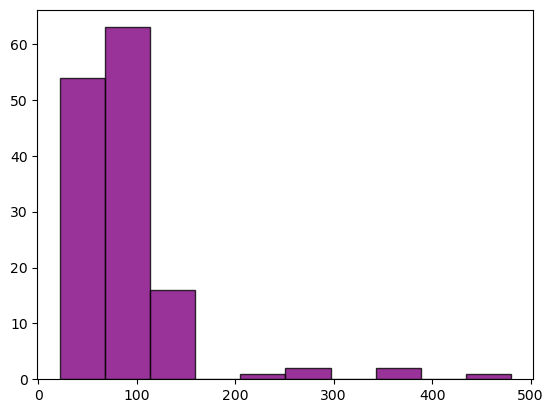

In [15]:
# show unique values in length of maternity days

# create histogram plot
hist, bins, _ = plt.hist(merge['Length of maternity (in days)'], bins = 10, color = 'purple', edgecolor = 'black', alpha = 0.8) #alpha = transparency
# plt.scatter()
# plt.ylabel('Number of Counties')
# plt.xlabel('GDP Per Capita')
# plt.grid(True, linestyle='-.',alpha=0.5)


In [16]:
merge[merge["Length of maternity (in days)"] == 22].index[0]

'Tunisia'

In [17]:
# check unique values in length of maternity column 
print('Length of maternity:')
print(merge['Length of maternity (in days)'].unique())
print('\nGDP per capita:')
print(merge['GDP_Per_Capita'].unique())

Length of maternity:
[ 70  90  40  22  60  66  98  75  88  65  84 120  85 126 140 112  30  80
  52  45  62  50  35 227 105 130 260 480 365 110]

GDP per capita:
[ 11319.08266722  10290.19162231   6827.85253906   4555.34765625
  10898.3662691     877.27285721   3004.39278552   4031.2233464
   1545.17795601   3887.72823948   1531.77859051   1418.07433094
  18579.37415519   1165.40820547   1718.9354763   24647.07805335
    877.30100554   2002.72267546   3399.70229437   2343.67934275
   8141.24112319   3372.90383468    824.94327565   1804.32252218
   5331.90408204  33678.73783561  15342.18130955  15597.61741641
   2614.14311009   9990.74583476  14066.10278218   2876.90390883
   1883.7965397    4769.07255917   2035.31854856   1770.47614739
   1995.1592516    4846.71245349   1098.64382021   5329.1215166
   2777.11176907   1805.48891919  17643.13027109  15084.99195277
  11671.1204749   13702.32120588  13427.5519644    3057.9154206
   9427.67897749  30313.66542948   7083.35805194  18233.015965

In [18]:
merge['Length of maternity (in days)'].describe()

count    139.000000
mean      87.115108
std       59.278644
min       22.000000
25%       60.000000
50%       70.000000
75%       90.000000
max      480.000000
Name: Length of maternity (in days), dtype: float64

In [19]:
print(f'Country with the least amount of maternity leave days: {merge[merge["Length of maternity (in days)"] == 22].index[0]}')

Country with the least amount of maternity leave days: Tunisia


In [20]:
print(f'Country with the most amount of maternity leave days: {merge[merge["Length of maternity (in days)"] == 480].index[0]}')

Country with the most amount of maternity leave days: Sweden


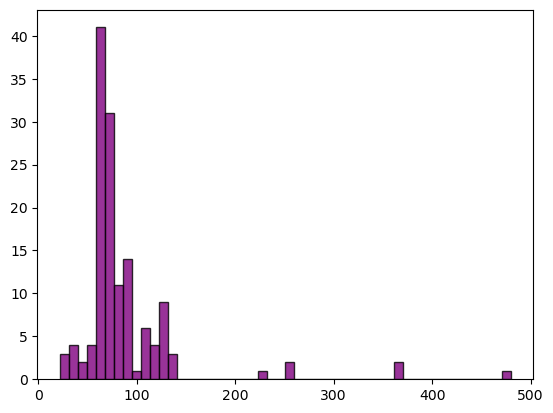

In [21]:
plt.hist(merge['Length of maternity (in days)'], bins = 50, color = 'purple', edgecolor = 'black', alpha = 0.8)
plt.show()

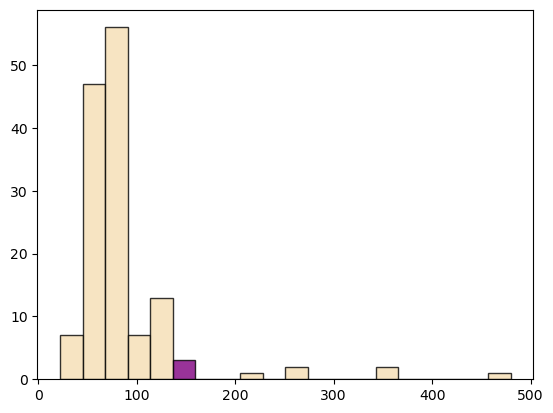

In [22]:
n, bins, patches = plt.hist(merge['Length of maternity (in days)'], 
                            bins = 20, 
                            color = 'wheat', 
                            edgecolor = 'black', 
                            alpha = 0.8);
patches[5].set_facecolor('purple')

In [23]:
print('List of Unique Countries in Dataset:')
print(merge.index.unique())

List of Unique Countries in Dataset:
Index(['Algeria', 'Egypt', 'Morocco', 'Sudan', 'Tunisia', 'Burundi', 'Comoros',
       'Djibouti', 'Ethiopia', 'Kenya',
       ...
       'Germany', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Kiribati'],
      dtype='object', name='Country', length=139)


In [24]:
country = 'Kiribati'
merge_val = merge.loc[country]
merge_val

Region Name                                           Oceania
M49 Code                                                  296
ISO-alpha2 Code                                            KI
ISO-alpha3 Code                                           KIR
Least Developed Countries (LDC)                             x
Land Locked Developing Countries (LLDC)                   NaN
Small Island Developing States (SIDS)                       x
Percentage of wages paid in covered period (%)             25
Provider of benefit                                  Employer
Length of maternity (in days)                              60
Year                                                     2013
GDP_Per_Capita                                    2029.378473
Name: Kiribati, dtype: object

In [25]:
country = 'Kiribati'
merge_val = merge.loc[country]['Length of maternity (in days)']
merge_val

60

In [29]:
merge_val.dtype

dtype('int64')

In [30]:
for bin_edge in bins:
    print(bin_edge)


22.0
44.9
67.8
90.69999999999999
113.6
136.5
159.39999999999998
182.29999999999998
205.2
228.1
251.0
273.9
296.79999999999995
319.7
342.59999999999997
365.5
388.4
411.29999999999995
434.2
457.09999999999997
480.0


tuple

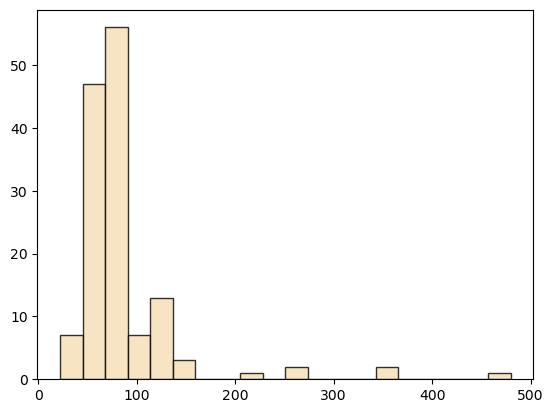

In [31]:
 type(plt.hist(merge['Length of maternity (in days)'], 
                            bins = 20, 
                            color = 'wheat', 
                            edgecolor = 'black', 
                            alpha = 0.8))

In [32]:
for bin_edge in bins:
    print(bin_edge, bin_edge > merge_val)
    if bin_edge > merge_val:
        break   

22.0 False
44.9 False
67.8 True


In [34]:
for i, bin_edge in enumerate(bins, start=-1):
    print(i, bin_edge, bin_edge > merge_val)
    if bin_edge > merge_val:
        break
        
print('--------')        
print(i)

-1 22.0 False
0 44.9 False
1 67.8 True
--------
1


In [36]:
country = 'Sudan'
merge_val = merge.loc[country]['Length of maternity (in days)']
print(merge_val)



for i, bin_edge in enumerate(bins, start=-1):
    print(i, bin_edge, bin_edge > merge_val)
    if bin_edge > merge_val:
        break
        
print('--------')        
print(i)

40
----------
-1 22.0 False
0 44.9 True
--------
0


In [39]:
print('List of Unique Countries in Dataset:')
print(merge.index.unique())

List of Unique Countries in Dataset:
Index(['Algeria', 'Egypt', 'Morocco', 'Sudan', 'Tunisia', 'Burundi', 'Comoros',
       'Djibouti', 'Ethiopia', 'Kenya',
       ...
       'Germany', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Kiribati'],
      dtype='object', name='Country', length=139)


70


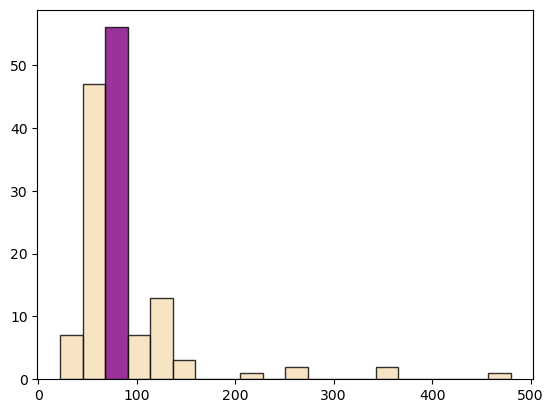

In [40]:
country = 'Djibouti'
merge_val = merge.loc[country]['Length of maternity (in days)']
print(merge_val)

n, bins, patches = plt.hist(merge['Length of maternity (in days)'], 
                            bins = 20, 
                            color = 'wheat', 
                            edgecolor = 'black', 
                            alpha = 0.8);

for i, bin_edge in enumerate(bins, start=-1):
    if bin_edge > merge_val:
        patches[i].set_facecolor('purple')
        break

In [ ]:
# check unique values in 'Least Developed Countries (LDC)' column

print('Least Developed Countries (LDC):')
ldc = merge[merge['Least Developed Countries (LDC)'] == 'x']['Country'].unique()
# ldc = ldc.sort_values(by='Least Developed Countries (LDC)', ascending=True) # doesn't work on a numpy array
ldc = sorted(ldc)
print(ldc)
print('----------------')
print('Total:')
print(len(ldc))
# print(merge[merge['Least Developed Countries (LDC)'] == 'x']['Country'].unique) # places first row at the very top
print('----------------')
# print(merge[merge['Least Developed Countries (LDC)'] == 'x'])

In [ ]:
# check unique values in 'Land Locked Developing Countries (LLDC)' column

print('Land Locked Developing Countries (LLDC):')
lldc = merge[merge['Land Locked Developing Countries (LLDC)'] == 'x']['Country'].unique()
lldc = sorted(lldc)
print(lldc)
print('----------')
print('Total:')
print(len(lldc)) # use len() to count the number of unique values

In [ ]:
# check unique values in 'Small Island Developing States (SIDS)' column

print('Small Island Developing States (SIDS):')
sids = merge[merge['Small Island Developing States (SIDS)'] == 'x']['Country'].unique()
sids = sorted(sids)
print(sids)
print('----------')
print('Total:')
print(len(sids)) # use len() to count the number of unique values

In [ ]:
# 